# 古典派の二分法と金融政策

In [1]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as sm
import matplotlib.pyplot as plt
import japanize_matplotlib
import py4macro

## 説明

「古典派の二分法」とは，実質変数と名目変数は別々の異なるメカニズムで決定されているという考え方である。実質変数である実質GDPや相対価格は，技術水準，選好，市場構造，資源の保有量などの「実質的」な要因に依存し，一方，財・サービスの価格や一般物価水準はマネーストックによって決定されると考える。またこの考えから派生する結果が「貨幣の中立性」である。即ち，中央銀行によるマネーストックの調整を通した金融政策は実質変数に影響を及ぼさない。実質GDPは金融政策から独立であるという考えである。

「古典派の二分法」と「貨幣の中立性」が成立するかどうかによって，マクロ経済学の短期分析のアプローチが全くことになる。前章で議論したRBCモデルにはマネーストックが入っておらず，インフレ率も出てこない。古典派の二分法が成立し，一般物価水準とインフレ率は別のメカニズムで決定されているので，わざわざ明示的にRBCの中で議論する必要がないということである。その裏にある仮定が，瞬時に調整される価格である。この仮定が成立する限り，実質変数と名目変数の決定プロセスを同時にモデル化することは余分な労力であり，実質変数のみにフォーカスすれば良いのである。

本章の目的は，「古典派の二分法」と「貨幣の中立性」が成立するかをデータに基づき考察することである。計量経済学の洗練された手法を用いて検証するということではなく，次の２つのデータセットを使って「古典派の二分法」と「貨幣の中立性」が成立しないこと示唆する「状況証拠」を考える。
* GDPとインフレ率の相関性
* ブレトンウッズ体制の崩壊

## GDPとインフレ率

`py4macro`に含まれるデータセット`jpn-1`を使うが，その中にある`gdp`と`inflation`を使い両変数の関係を考える。

In [2]:
df = py4macro.data('jpn-q').loc[:,['gdp','inflation']]

次の変数を作成し図示しよう。
* GDPトレンドからの乖離率（％）
* インフレ率のトレンドからの乖離（％ポイント）

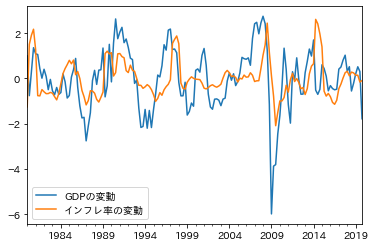

In [3]:
df['GDPの変動'] = 100*np.log( df['gdp']/py4macro.trend(df['gdp']) )
df['インフレ率の変動'] = df['inflation'] - py4macro.trend(df['inflation'])

df[['GDPの変動','インフレ率の変動']].plot()
pass

この図は次の２つの点を示している。第一に，GDPとインフレ率の変動は循環的である。即ち，同じ方向に動く傾向にある。第二に，GDPの変動に後追いするようにインフレ率が動いている。この点をさらに探るためにGDPとラグがあるインフレ率の相関係数を計算してみよう。次のコードの`shift()`は以前も使ったが，変数を１期ずらすメソッドである。引数に負の整数を設定することにより先の期の変数を指定することができる。

In [4]:
print('      GDPの変動との相関係数\n-------------------------------')
for n in range(12):
    
    df_temp = df.copy()   # 1
    
    df_temp['インフレ率の変動_shift'] = df_temp['インフレ率の変動'].shift(-n)
    corr = df_temp[['GDPの変動', 'インフレ率の変動_shift']].corr().iloc[0,1]
    
    print(f'{n:>3}期先のインフレ率の変動: {corr:>6.3f}')

      GDPの変動との相関係数
-------------------------------
  0期先のインフレ率の変動:  0.335
  1期先のインフレ率の変動:  0.478
  2期先のインフレ率の変動:  0.524
  3期先のインフレ率の変動:  0.506
  4期先のインフレ率の変動:  0.453
  5期先のインフレ率の変動:  0.311
  6期先のインフレ率の変動:  0.183
  7期先のインフレ率の変動:  0.076
  8期先のインフレ率の変動: -0.029
  9期先のインフレ率の変動: -0.129
 10期先のインフレ率の変動: -0.197
 11期先のインフレ率の変動: -0.206


```{admonition} コードの説明
:class: dropdown

1. `.copy()`を使い`df`のコピーを作成し，それを`df_temp`に割り当てる。続く行では`df_temp`を使い計算などを行うが，１回のループが終わる度に`df_temp`は`df`のコピーとしてリセットされる。
```

実質GDPとインフレ率の相関係数は徐々に高くなり，２期先で最大になり減少することが確認でき，両変数は密接に関係していることを示唆している。一方で，因果関係を示すための洗練された手法を使っているのではなく，単なる相関係数であり「状況証拠」にしか過ぎない。しかし「状況証拠」も含めてデータが示しているものを説明できてこそ「真のメカニズム」を捉える経済モデルということができる。RBCモデルは古典派の二分法が成立しており，実質GDPとインフレ率の相関関係を説明できないのが大きな欠点の一つとなっている。

## 金融政策

金融政策が実質GDPのような実質変数に影響を及ぼすかという問題は，一見明白なように見えるが非常に複雑な問題である。因果関係を示すために様々なそして高度な手法が提案されており，それを説明することは授業の範囲を超えることになる。ここでは代わりに，歴史的に重大な金融政策が実質変数に影響をもたらした例を取り上げる。[参考資料](https://eml.berkeley.edu/~enakamura/papers/macroempirics.pdf)

### 相対価格（おさらい）

本題に入る前に，実質変数と名目変数の違いを確認する。$w$を名目賃金（円），$p_A$をA財の価格（円）としよう。実質賃金$\dfrac{w}{p_A}$は，$w$円で購入できるA財の数量を表している。即ち，A財で測る名目賃金$w$の購買力を示しており，$w$の実質的な価値はA財の$\dfrac{w}{p_A}$個に相当するという意味である。

次にB財の価格を$p_B$として相対価格$\dfrac{p_B}{p_A}$を考えよう。実質賃金を使うと次のように解釈できる。

$$
\begin{align*}
\frac{p_B}{p_A}
&=
\frac{w/p_A}{w/p_B}=
\frac{\text{名目賃金$w$で購入できるA財の数量}}{\text{名目賃金$w$で購入できるB財の数量}} \\
&=\text{B財１単位に対してのA財の数量}
\end{align*}
$$

即ち，B財１単位はA財$\dfrac{p_B}{p_A}$単位に相当する。ここで重要なポイントは，$\dfrac{w}{p_A}$であっても$\dfrac{p_B}{p_A}$であってもA財の数量で表されており，貨幣単位（円）ではないことである。

実質変数を考える上で基準となる財はニューメレール財と呼ばれる。上の例ではA財であり，より一般的には一般物価水準が使われる。

次に為替レートを考えよう。名目為替レートは相対価格のように比率になっているが，もちろん名目である。円・ドルの名目為替レート（円/＄）は，1米ドルを何円と交換できるかの比率を表しており，単位は貨幣単位（円）で与えられる。一方で日米の実質為替レートは次のように解釈できる。

* $e$：名目為替レート（円/＄）
* $P_{\text{日}}$：日本財の価格（円）
* $P_{\text{米}}$：米国財の価格（＄）
* $eP_{\text{米}}$：円で表示した米国財の価格（円）

$$
\begin{align*}
\varepsilon
&=\frac{eP_{\text{米}}}{P_{\text{日}}} \tag{RealEx}\\
&=\frac{w/P_{\text{日}}}{w/\left(eP_{\text{米}}\right)}
=\frac{\text{名目賃金$w$で購入できる日本財の数量}}{\text{名目賃金$w$で購入できる米国財の数量}} \\
&=\text{米国財１単位に対しての日本財の数量} \\
&=\text{米国財と日本財の交換比率}
\end{align*}
$$

実質為替レートは米国財の数量で表されている。

古典派の二分法が成立している場合，相対価格は「実質的」な要因によって決定され，分母・分子の名目変数はマネーストックのような貨幣的な要因に依存する事になる。この点を念頭にブレトンウッズ体制の崩壊の効果について考えよう。

### ブレトンウッズ体制

歴史的な金融政策の例としてブレトンウッズ体制を考える。ブレトンウッズ体制下では名目為替レートの固定相場制が採用されていた。しかし1973年2月にブレトンウッズ体制は崩壊し、変動相場制に移行する。
* 1971年8月15日に米国はドルと金との交換停止を発表
* 1973年2月14日に変動相場制に移行

この政策変更は名目為替レートに関しての政策であり，「実質的」な要因の変化ではない。純粋に貨幣的な政策変更である。この金融政策変更の効果を考えるために，全ての財・サービスの価格は十分に伸縮的であり，瞬時に価格は調整され市場は常に精算する（需要と供給は常に等しい）と**仮定**しよう。この仮定のもとでは，古典派の二分法が成立し実質変数である相対価格と実質為替レートは技術や選好などの「実質的」な要因のみに依存することになる。更に，ブレトンウッズ体制は崩壊の前後では「実質的」な要因の大きな変化は起きていないため，実質為替レートは大きく変化していない事になる。

この事を念頭に，実質変数がどのように変化したかを考察する。特に，価格の水準ではなく**変化**に注目するために実質為替レートの変化率を考えることにする。式（RealEx）を時間微分すると次式となる。

$$
\frac{\dot{\varepsilon}}{\varepsilon}=
\frac{\dot{e}}{e}+
\frac{\dot{P}_{\text{米}}}{P_{\text{米}}}-
\frac{\dot{P}_{\text{日}}}{P_{\text{日}}}
$$ (eq:16-change_in_rex)

古典派の二分法の下では，$\dfrac{\dot{\varepsilon}}{\varepsilon}$は金融政策から影響を受けないことになる。実際にそうだったのかを確かめるために`py4macro`に含まれるデータセット`ex`を使う。

### データ

In [5]:
df_ex = py4macro.data('ex')
df_ex.head()

,real_ex_geus_%change,real_ex_jpus_%change,real_ex_jpus,ex_jpus,relative_p_jpus
,,,,,
1960-01-01,NaN,NaN,247.109328,361.77,0.683056
1960-02-01,0.906208,0.239840,247.701994,361.77,0.684695
1960-03-01,-0.004076,-0.680012,246.017589,358.22,0.686778
1960-04-01,-0.229978,0.721608,247.792871,361.77,0.684946
1960-05-01,-0.283286,-1.041546,245.211994,361.25,0.678788


内容を確認しよう。

In [6]:
py4macro.data('ex',description=1)


    | `real_ex_geus_%change`: 独マルク/米ドル実質為替レート変動率（％）
    |                           * 月次，季節調整ない
    | `real_ex_jpus_%change`: 円/米ドル実質為替レート変動率（％）
    |                           * 月次，季節調整ない
    | `real_ex_jpus`:         円/米ドル実質為替レート
    |                           * 月次，季節調整ない
    | `ex_jpus`:              円/米ドル名目為替レート
    |                           * 月次，季節調整ない
    | `relative_p_jpus`:      日本の一般物価水準に対しての米国の一般物価水準の比率
    |                           * 日本のCPI分の米国のCPI
    |                           * 2015年CPI=100
    |                           * 月次，季節調整ない
    |
    | * 期間：1960年1月〜
    |
    | ＜出典＞
    | OECD Main Economic Indicators


`.info()`を使うと行ラベルが時系列用になっていることが確認できる。

In [7]:
df_ex.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 736 entries, 1960-01-01 to 2021-04-01
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   real_ex_geus_%change  735 non-null    float64
 1   real_ex_jpus_%change  735 non-null    float64
 2   real_ex_jpus          736 non-null    float64
 3   ex_jpus               736 non-null    float64
 4   relative_p_jpus       736 non-null    float64
dtypes: float64(5)
memory usage: 34.5 KB


`real_ex_jpus_%change`と`real_ex_geus_%change`を使い1986年3月までのデータを並べてプロットしよう。

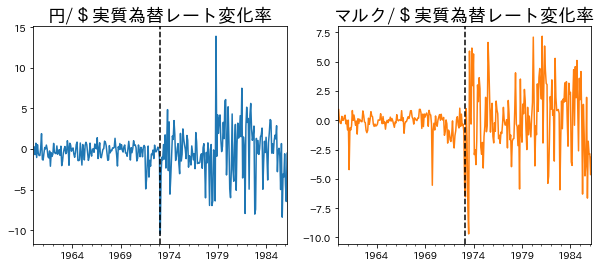

In [8]:
col = df_ex.columns          # 1
end_month = '1986-03-01'     # 2
float_month = '1973-02-01'   # 3

# 4
ax = df_ex.loc[:end_month,[col[1],col[0]]] \
          .plot(subplots=True, layout=(1,2),
                figsize=(10,4),legend=False)

for i, c in enumerate(['円','マルク']):  #5f
    
    # 6
    ax[0,i].axvline(float_month, c='k', linestyle='--')
    
    # 7
    ax[0,i].set_title(f'{c}/＄実質為替レート変化率', size=18)
pass

````{admonition} コードの説明
:class: dropdown

1. 列名を変数`col`に割り当てる。
2. 文字列`'1986-03-01'`を変数`end_month`に割り当てる。
3. 文字列`'1973-02-01'`を変数`float_month`に割り当てる。
4. 引数として`subplots=(1,2)`を使っているので２つの「軸」があり，`Numpy`の`array`として次のように格納されている。
    ```
    array([[軸１,軸２]])
    ```
    * この`array`が`ax`に割り当てられている。従って、(2)と(3)にあるように，軸１にアクセスするには`ax[0]`，軸２にアクセスするには`ax[1]`とする必要がある。
    * 列名を`col[0]`と`col[1]`を使って指定しており，`col[0]`は`col`の0番目の要素であり，`col[1]`は`col`の1番目の要素である。
    * `legend=False`は凡例を隠すため。
5. `enumerate()`は引数のリストの要素のインデックと要素自体をタプルとして返す。最初のループで`(0,'円')`，次のループで`(1,'マルク')`を返し，タプルの0番目の要素は`i`に，1番目の要素は`c`に割り当てている。
6. `axvline()`は縦線を引くメソッドであり，３つの引数を使っている。
    * `'1973-2-1'`：横軸の値
    * `c=red`：色を赤に指定（`k`は黒）
    * `linestyle='--'`：点線に指定
7. `.set_title()`は「軸」にタイトルを付けている。

次のコード同じ図（色は異なる）をプロットすることができる。
```
fig, ax = plt.subplots(1,2, figsize=(10,4))

ax[0].plot('real_ex_jpus_%change', data=df_ex.loc[:end_month,:])
ax[1].plot('real_ex_geus_%change', data=df_ex.loc[:end_month,:])

ax[0].axvline(pd.to_datetime(float_month),  # 1
              c='red', linestyle='--')
ax[1].axvline(pd.to_datetime(float_month),  # 2
              c='red', linestyle='--')

ax[0].set_title('円/＄実質為替レート変化率',size=18)
ax[1].set_title('マルク/＄実質為替レート変化率',size=18)
```
この場合は次の点に要注意
1. `df_ex`の行ラベルが`DatetimeIndex`と呼ばれる時系列用になっており，図の横軸に使われている。それにより`.axvline()`の引数に`'1973-02-01'`とするとエラーとなる。文字列`'1973-02-01'`を時系列用に変換するために関数`pd.to_datetime()`を使う必要がある。
2. 同上。
````

図にある黒の点線は固定相場制から変動相場制に移行した1973年2月を示している。点線の右側と左側では明らかに変動に違いがある。どの程度変動の大きさが異なるのかを調べるために、固定相場制（158ヶ月）と変動相場制（158ヶ月）での標準偏差を計算し、その比率を比べてみよう。

In [9]:
ex_list = [col[1],col[0]]
country_list = ['Yen/$','Mark/$']

print('\n実質為替レート変動率の標準偏差\n-------------------------')
for e, c in zip(ex_list, country_list):
    
    ex_before = df_ex.loc[:'1973-01-01', e].std()
    
    ex_after = df_ex.loc['1973-02-01':end_month, e].std()
    
    print(f'{c:<8}{ex_after/ex_before:.2f}')


実質為替レート変動率の標準偏差
-------------------------
Yen/$   3.58
Mark/$  3.82


実質為替レートの変動は3倍以上になっている。固定相場制から変動相場制への移行は貨幣的な政策変更であるが，実質変数である実質為替レートに大きな影響を与えているのである。従って，実質為替レートに依存する他の実質変数も影響を受けることになる。例えば，輸出入に対してのインパクトがあるだろうし，最終的には実質GDPへの影響につながっていく。古典派の二分法と貨幣の中立性が成立していないことを示唆する結果である。

では，なぜ実質為替レートの変動は大きくなったのだろう。固定相場制の場合，$\dot{e}=0$であり式[](eq:16-change_in_rex)は次式となる。

$$
\frac{\dot{\varepsilon}}{\varepsilon}=
\frac{\dot{P}_{\text{米}}}{P_{\text{米}}}-
\frac{\dot{P}_{\text{日}}}{P_{\text{日}}}
$$ 

もし古典派の二分法と貨幣の中立性が成立しているのであれば，名目為替レートが一定になっている分，価格の変動がより大きくなり，ブレトンウッズ体制崩壊の前後で実質為替レートの変動は大きく変わっていないはずである。そうなっていない理由は，価格の粘着性と考えられる。価格調整に時間がかかるため，ブレトンウッズ体制崩壊前では実質為替レートは十分に変動しなかったのである。一旦，変動相場制に移行すると、価格調整のペースは同じでも名目為替レートの変動により実質為替レートの変動が大きくなっていると考えられる。もし価格が瞬時に調整されたのであれば，固定相場制での実質為替レートの変動はより大きかっただろうし，変動相場制移行後も概ね同じ変動が続いていたはずだということである。

この歴史的な「実験」は金融政策は実質変数に影響を与えることを示唆している。一方，前章のRBCモデルは貨幣の中立性が成立（仮定）されており，マクロ経済の短期的な動きを十分に捉えているとは言い難い。その点を克服する理論がニューケインジアン・モデルである。